<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-09-20 07:05:50--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  69.6MB/s    in 2.9s    

2025-09-20 07:05:55 (69.6 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


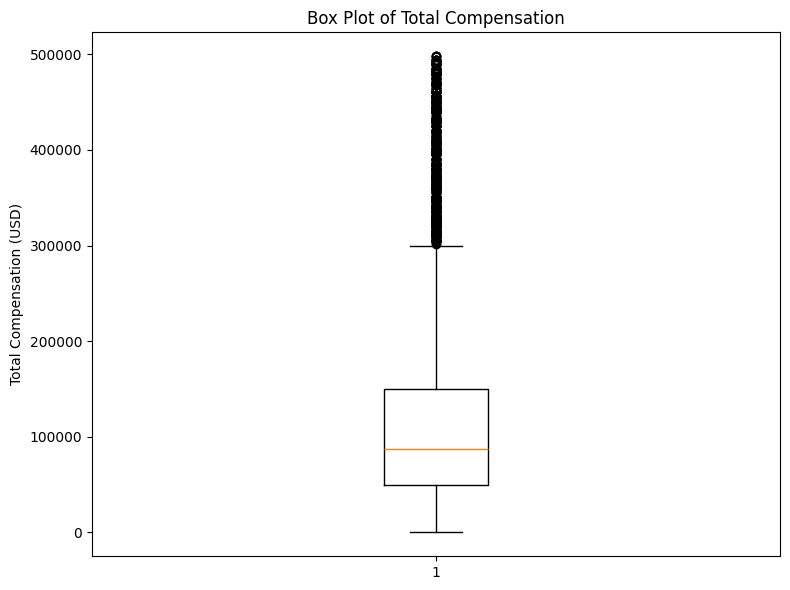

In [8]:
# your code goes here
df = pd.read_sql_query("SELECT CompTotal FROM main;", conn)

# Convert to numeric and clean data
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])
df = df[df['CompTotal'] > 0]          # remove non-positive values
df = df[df['CompTotal'] < 500000]    # optional: remove extreme outliers

# Plot box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['CompTotal'], vert=True)
plt.ylabel('Total Compensation (USD)')
plt.title('Box Plot of Total Compensation')
plt.tight_layout()
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


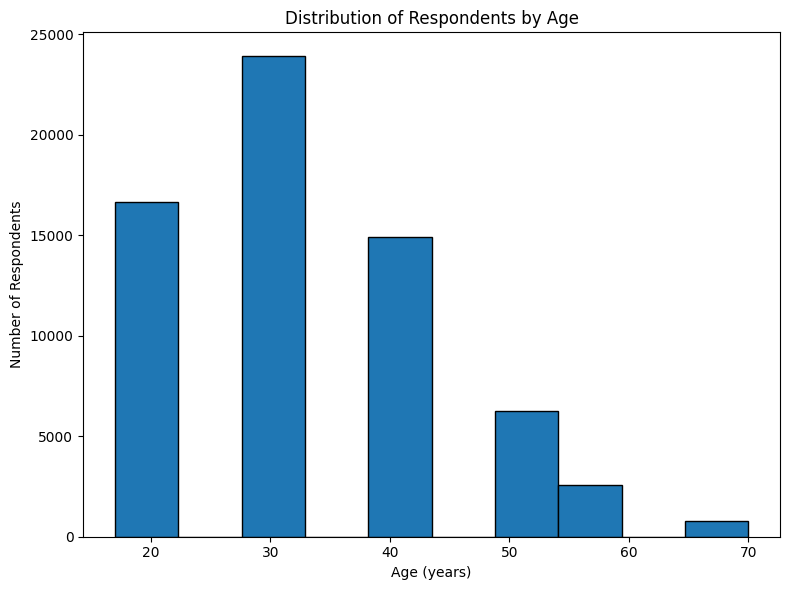

In [9]:
# your code goes here
df = pd.read_sql_query("SELECT Age FROM main;", conn)

# Drop missing values
df = df.dropna(subset=['Age'])

# Map Age ranges to numeric midpoints
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None
}

df['AgeNumeric'] = df['Age'].map(age_mapping)
df = df.dropna(subset=['AgeNumeric'])

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(df['AgeNumeric'], bins=10, edgecolor='black')

plt.xlabel('Age (years)')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Respondents by Age')
plt.tight_layout()
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


<Figure size 1200x600 with 0 Axes>

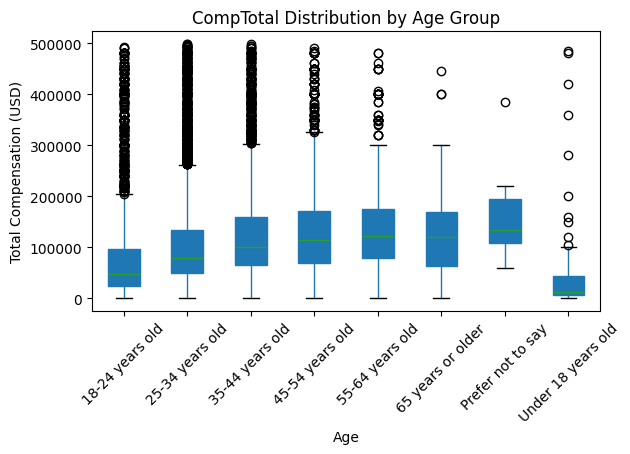

In [12]:

# Query Age and CompTotal
df = pd.read_sql_query("SELECT Age, CompTotal FROM main;", conn)

# Convert CompTotal to numeric and clean
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal', 'Age'])
df = df[df['CompTotal'] > 0]        # remove non-positive values
df = df[df['CompTotal'] < 500000]  # optional: remove extreme outliers

# Define age order and filter to existing age groups
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old',
             '35-44 years old', '45-54 years old', '55-64 years old',
             '65 years or older']
existing_age_groups = [age for age in age_order if age in df['Age'].unique()]

# Plot boxplot
plt.figure(figsize=(12, 6))
df.boxplot(column='CompTotal', by='Age', grid=False, vert=True, patch_artist=True)
plt.xticks(rotation=45)
plt.ylabel('Total Compensation (USD)')
plt.title('CompTotal Distribution by Age Group')
plt.suptitle('')  # remove automatic title
plt.tight_layout()
plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


<Figure size 4000x600 with 0 Axes>

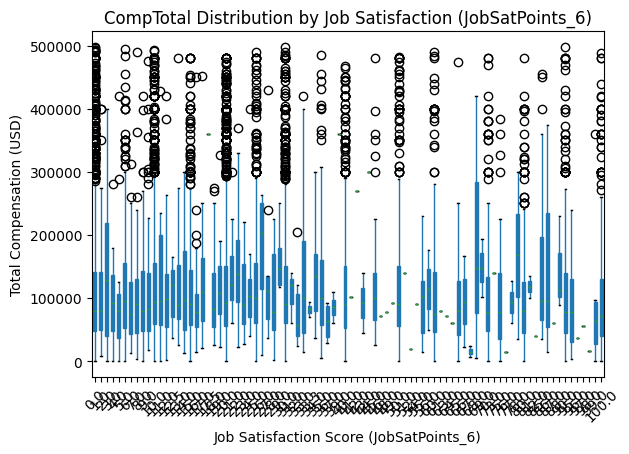

In [15]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt

# Query CompTotal and JobSatPoints_6
df = pd.read_sql_query("SELECT CompTotal, JobSatPoints_6 FROM main;", conn)

# Convert to numeric and clean data
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

df = df.dropna(subset=['CompTotal', 'JobSatPoints_6'])
df = df[df['CompTotal'] > 0]         # remove non-positive compensation
df = df[df['CompTotal'] < 500000]   # optional: remove extreme outliers

# Sort job satisfaction scores
job_sat_order = sorted(df['JobSatPoints_6'].unique())

# Plot box plot
plt.figure(figsize=(40, 6))
df.boxplot(column='CompTotal', by='JobSatPoints_6', grid=False, vert=True, patch_artist=True)
plt.xticks(rotation=45)
plt.xlabel('Job Satisfaction Score (JobSatPoints_6)')
plt.ylabel('Total Compensation (USD)')
plt.title('CompTotal Distribution by Job Satisfaction (JobSatPoints_6)')
plt.suptitle('')  # remove automatic boxplot title
plt.tight_layout()
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


<Figure size 1200x600 with 0 Axes>

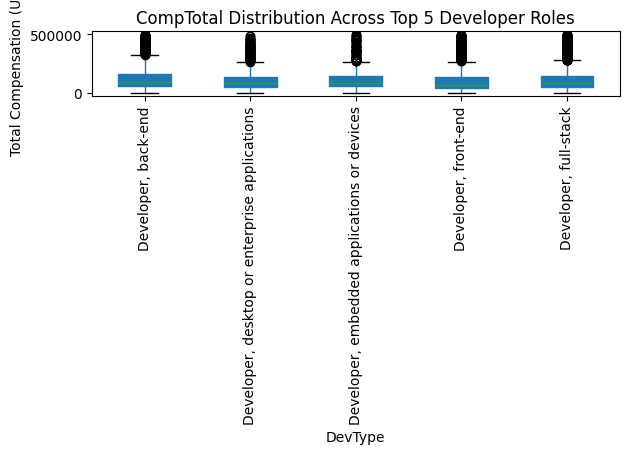

In [17]:
# your code goes here
# Query DevType and CompTotal
df = pd.read_sql_query("SELECT DevType, CompTotal FROM main;", conn)

# Convert CompTotal to numeric and clean
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal', 'DevType'])
df = df[df['CompTotal'] > 0]
df = df[df['CompTotal'] < 500000]  # optional: remove extreme outliers

# Split multiple roles and explode
df_roles = df.assign(DevType=df['DevType'].str.split(';')).explode('DevType')

# Find top 5 roles
top5_roles = df_roles['DevType'].value_counts().head(5).index.tolist()

# Filter to top 5 roles
df_top5 = df_roles[df_roles['DevType'].isin(top5_roles)]

# Plot box plot
plt.figure(figsize=(12, 6))
df_top5.boxplot(column='CompTotal', by='DevType', grid=False, patch_artist=True)
plt.xticks(rotation=90)
plt.ylabel('Total Compensation (USD)')
plt.title('CompTotal Distribution Across Top 5 Developer Roles')
plt.suptitle('')  # remove default title
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


In [ ]:
# your code goes here

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


<Figure size 1000x600 with 0 Axes>

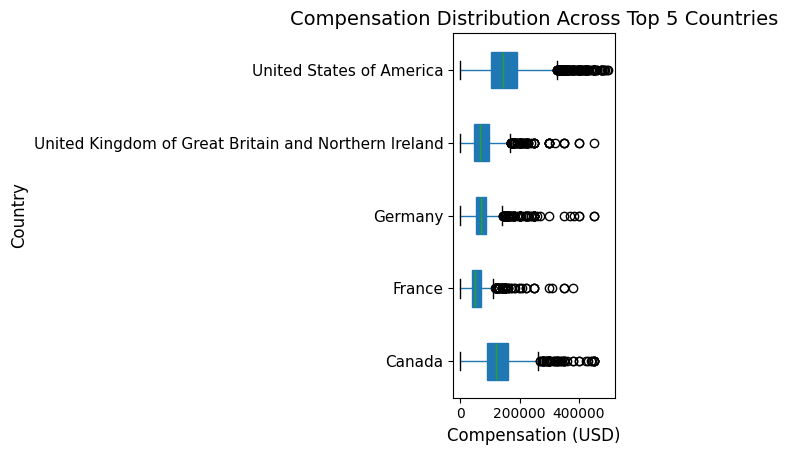

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Query Country and CompTotal
df = pd.read_sql_query("SELECT Country, CompTotal FROM main;", conn)

# Convert CompTotal to numeric and clean
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal', 'Country'])
df = df[df['CompTotal'] > 0]
df = df[df['CompTotal'] < 500000]  # remove extreme outliers

# Top 5 countries
top5_countries = df['Country'].value_counts().head(5).index.tolist()
df_top5 = df[df['Country'].isin(top5_countries)]

# Horizontal box plot for better y-axis labels
plt.figure(figsize=(10, 6))
df_top5.boxplot(column='CompTotal', by='Country', grid=False, patch_artist=True, vert=False)

plt.xlabel('Compensation (USD)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Compensation Distribution Across Top 5 Countries', fontsize=14)
plt.suptitle('')  # remove default title
plt.yticks(fontsize=11)  # make y-axis labels readable
plt.tight_layout()
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


<Figure size 1200x600 with 0 Axes>

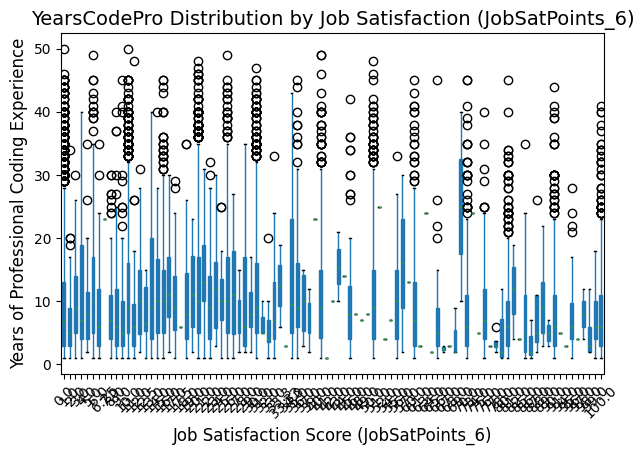

In [32]:
# your code goes here
df = pd.read_sql_query("SELECT YearsCodePro, JobSatPoints_6 FROM main;", conn)

# Convert to numeric and clean data
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

df = df.dropna(subset=['YearsCodePro', 'JobSatPoints_6'])
df = df[df['YearsCodePro'] >= 0]  # remove negative or invalid values

# Sort job satisfaction scores
job_sat_order = sorted(df['JobSatPoints_6'].unique())

# Plot box plot
plt.figure(figsize=(12, 6))
df.boxplot(column='YearsCodePro', by='JobSatPoints_6', grid=False, patch_artist=True)
plt.xticks(rotation=45)
plt.xlabel('Job Satisfaction Score (JobSatPoints_6)', fontsize=12)
plt.ylabel('Years of Professional Coding Experience', fontsize=12)
plt.title('YearsCodePro Distribution by Job Satisfaction (JobSatPoints_6)', fontsize=14)
plt.suptitle('')  # remove default Pandas title
plt.tight_layout()
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [33]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
